In [46]:
import pandas as pd
import numpy as np
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
sample = pd.read_csv("./data/sample_submission.csv")

In [47]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [48]:
test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [49]:
train.drop(columns = 'id', inplace = True)
test.drop(columns = 'id', inplace = True)

In [50]:
from Paquetes.visualization import Eda
train_eda = Eda(train)

In [51]:
train_eda.infocat

__________________________________________________________________
Categorias para la columna == Drug:  ['Placebo', 'D-penicillamine']
Frecuencia de las categorias : 
 Drug
Placebo            4010
D-penicillamine    3895
Name: count, dtype: int64
Numero de categorias en la columna == Drug ---  2
Numero de valores nulos en la columna == Drug ---  0
Informacion generica == Drug : 
  count        7905
unique          2
top       Placebo
freq         4010
Name: Drug, dtype: object
__________________________________________________________________
__________________________________________________________________
Categorias para la columna == Sex:  ['F', 'M']
Frecuencia de las categorias : 
 Sex
F    7336
M     569
Name: count, dtype: int64
Numero de categorias en la columna == Sex ---  2
Numero de valores nulos en la columna == Sex ---  0
Informacion generica == Sex : 
  count     7905
unique       2
top          F
freq      7336
Name: Sex, dtype: object
___________________________________

__________________________________________________________________
Numero de valores diferentes en la columna == N_Days ---  461
Tamaño de la columna == N_Days ---  7905
% de valores unicos frente al numero de muestras de la columna == N_Days ---  5.832 %
Media de la columna == N_Days ---  2030.1733
------------------------------------------------------------------
Maximo valor de la columna == N_Days ---  4795
Informacion del maximo valor en la columna : N_Days:
 N_Days            4795.00
Age              19025.00
Bilirubin            1.00
Cholesterol        331.00
Albumin              3.70
Copper              54.00
Alk_Phos           466.00
SGOT                99.33
Tryglicerides      133.00
Platelets          243.00
Prothrombin         10.60
Stage                3.00
Name: 565, dtype: float64
------------------------------------------------------------------
Numero de valores nulos en la columna == N_Days ---   0
Numero de valores '0' en la columna == N_Days ---   0
Porcentaje de va

__________________________________________________________________
__________________________________________________________________
Numero de valores diferentes en la columna == Albumin ---  160
Tamaño de la columna == Albumin ---  7905
% de valores unicos frente al numero de muestras de la columna == Albumin ---  2.024 %
Media de la columna == Albumin ---  3.5483
------------------------------------------------------------------
Maximo valor de la columna == Albumin ---  4.64
Informacion del maximo valor en la columna : Albumin:
 N_Days            3992.00
Age              20684.00
Bilirubin            1.30
Cholesterol        290.00
Albumin              4.64
Copper              39.00
Alk_Phos           836.00
SGOT               137.95
Tryglicerides      146.00
Platelets          430.00
Prothrombin         11.50
Stage                2.00
Name: 479, dtype: float64
------------------------------------------------------------------
Numero de valores nulos en la columna == Albumin ---   0

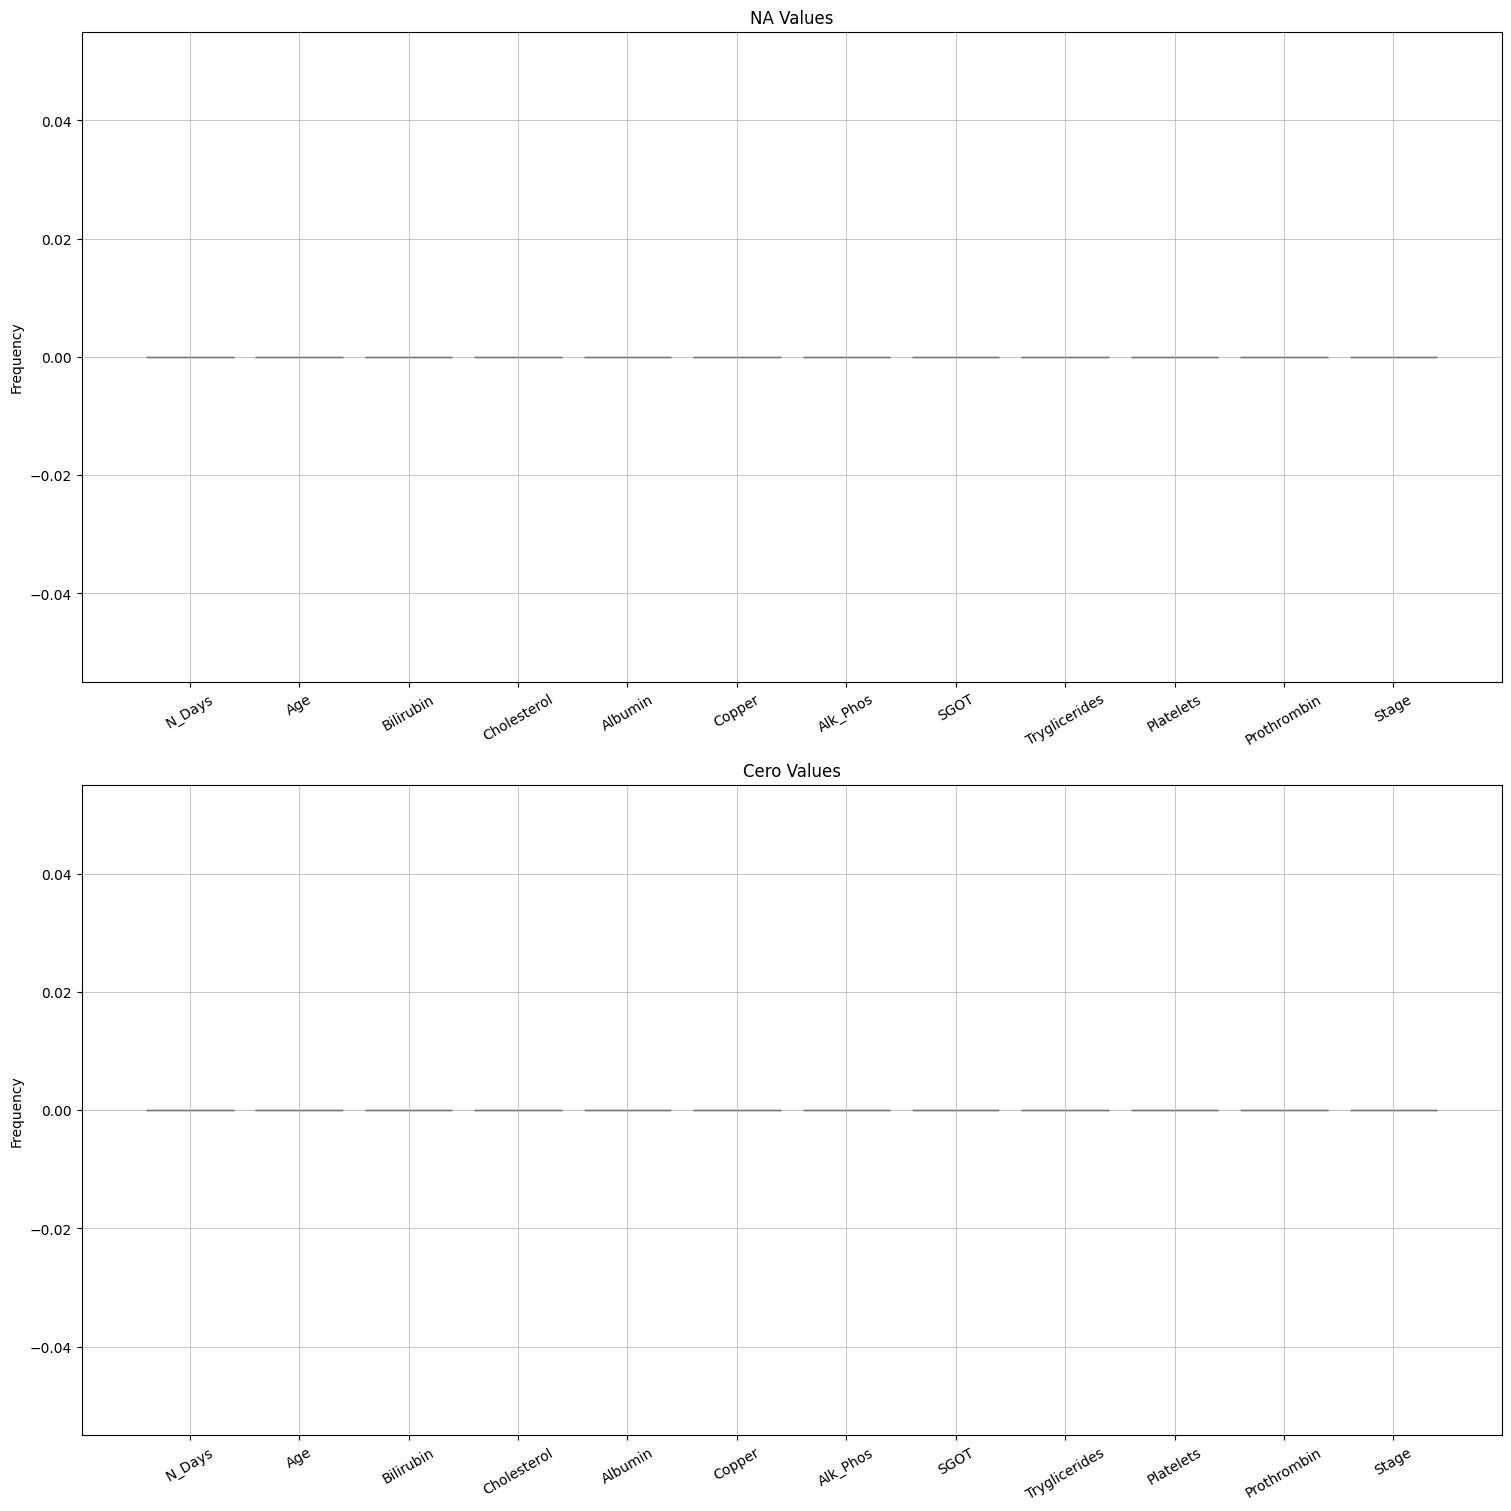

In [52]:
fture_num_df_info = train_eda.infonum

In [53]:
fture_num_df_info.head(12)

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
COUNT,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
MIN,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
MAX,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000
MEAN,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
STD,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
NA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NA %,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


EDA CONTINUAR ...

Tratamiento del desbalanceo de clases:

In [54]:
# Proporciones de las status clases dentro de la status feature para estudiar analiticamente el posible desbalanceo de clases 
print(f"Clases : {train_eda.data['Status'].unique()}")
for _ ,unique in enumerate(train_eda.data["Status"].unique()):
    print(f'Proporción de la clase {unique} : {round(100 *train_eda.data["Status"][train_eda.data["Status"]== unique].shape[0]/train_eda.data["Status"].shape[0],3)} %')


Clases : ['D' 'C' 'CL']
Proporción de la clase D : 33.713 %
Proporción de la clase C : 62.808 %
Proporción de la clase CL : 3.479 %


MUY DESBALANCEADO EN LA CLASE CL

In [55]:
# check version number
import imblearn
print(imblearn.__version__)

0.12.0


In [75]:
X = train_eda.data.drop(columns = "Status")
y = train_eda.data["Status"]


In [76]:
# Codificacion target feature
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
print("Old classes : ", np.unique(y))
lab_encoder = LabelEncoder()
y_encoded = lab_encoder.fit_transform(y)


# Aseguramos proporciones de las clases de nuevo
print("New codify classes : ", np.unique(y_encoded))
print(f"Frecuencia de clases : {np.bincount(y_encoded)}")
for idx, v in enumerate(np.bincount(y_encoded)):
    print(f'Proporción de la clase {idx} : {100*v/y_encoded.shape[0] : .3f}','%')


Old classes :  ['C' 'CL' 'D']
New codify classes :  [0 1 2]
Frecuencia de clases : [4965  275 2665]
Proporción de la clase 0 :  62.808 %
Proporción de la clase 1 :  3.479 %
Proporción de la clase 2 :  33.713 %


INICIA TRATAMIENTO DE CLASES DESBALANCEADAS

PASOS:
1. Codificación de las variables nominales para la aplicación posterior de algoritmos de sobremuestreo sintéticos de la clase minoritaria (dado que, estos no soportan variables nominales o categóricas). Nota: se debe aplicar la codificación que se vaya a incluir en el pipeline final, debido a que serán estas features codificadas con cierta técnica las que se usen para la generación de nuevas muestras de la clase minoritaria. Si no se usase la misma codificación, el dataset utilizado para el resample y el dataset usado para el entrenamiento no coincidirían.
2. Se aplican:
   - Diferentes técnicas de resample.
   - Diferentes algoritmos de clasificación multiclase.
   - Diferentes técnicas de cross validation.
   - Diferentes métricas de evaluación de performance de estos algoritmos tanto en el conjunto de train como en el conjunto de test (este último no está sobremuestreado con el objetivo de ver la capacidad de generalización sobre el dataset con las proporción de clases desbalanceadas originales).
3. Se elige la mejor técnica de resample, que es la que se va a aplicar sobre el conjunto de train finalmente.

Nota: Cabe destacar que para no generar unas métricas excesivamente elevadas en el train set sobremuestreado comparado con el test set no sobremuestreado, el aumento de muestras de la clase
minoritaria no será muy drástico. 
Duda: Aplicar resample a todo el dataset o solo al conjunto de train?

In [77]:
# Codificacion categorical features
col_one_hot = train_eda.cat_data.drop(columns = ["Edema","Status"]).columns
print(col_one_hot)


print("Edema classes : ", np.unique(X["Edema"]))
lab_encoder = LabelEncoder()
X["Edema_encoded"] = lab_encoder.fit_transform(X["Edema"])
print("Col X",X.columns)
X = X.drop(columns = "Edema")
print("Nex Edema classes : ", np.unique(X["Edema_encoded"]))
print("Col X",X.columns)

Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders'], dtype='object')
Edema classes :  ['N' 'S' 'Y']
Col X Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage',
       'Edema_encoded'],
      dtype='object')
Nex Edema classes :  [0 1 2]
Col X Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
       'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Edema_encoded'],
      dtype='object')


In [78]:
from sklearn.preprocessing import OneHotEncoder

# Create and fit the OneHotEncoder
one_hot = OneHotEncoder(drop='if_binary')
X_encoded = one_hot.fit_transform(X.loc[:, col_one_hot].values)

# Get the feature names of the transformed data
encoded_feature_names = one_hot.get_feature_names_out(input_features=col_one_hot)

print("Encoded feature names:", encoded_feature_names)
X_encoded = pd.DataFrame(X_encoded, columns = encoded_feature_names)


Encoded feature names: ['Drug_Placebo' 'Sex_M' 'Ascites_Y' 'Hepatomegaly_Y' 'Spiders_Y']


ValueError: Shape of passed values is (7905, 1), indices imply (7905, 5)

In [ ]:
X.head


In [ ]:
X.head(6)

In [ ]:
X_train_encoded = column_transformer.fit_transform(X)
print(X_train_encoded.columns)
print(X_train_encoded.shape)


print(X_train_encoded.shape, y_encoded.shape)

# Aseguramos proporciones de las clases de nuevo
print("New codify classes : ", np.unique(y_encoded))
print(f"Frecuencia de clases : {np.bincount(y_encoded)}")
for idx, v in enumerate(np.bincount(y_encoded)):
    print(f'Proporción de la clase {idx} : {100*v/y_encoded.shape[0] : .3f}','%')

TypeError: LabelEncoder.fit_transform() takes 2 positional arguments but 3 were given

In [ ]:
# Split test y train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_encoded,test_size=0.2, random_state=42, shuffle=True, stratify = y_encoded )
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6324, 18) (6324,) (1581, 18) (1581,)


In [ ]:
# Aseguramos proporciones de las clases de nuevo en test y train
print("New codify classes : ", np.unique(y_train))
print(f"Frecuencia de clases : {np.bincount(y_train)}")
for idx, v in enumerate(np.bincount(y_train)):
    print(f'Proporción de la clase {idx} : {100*v/y_train.shape[0] : .3f}','%')

New codify classes :  [0 1 2]
Frecuencia de clases : [3972  220 2132]
Proporción de la clase 0 :  62.808 %
Proporción de la clase 1 :  3.479 %
Proporción de la clase 2 :  33.713 %


In [ ]:
# Aseguramos proporciones de las clases de nuevo
print("New codify classes : ", np.unique(y_test))
print(f"Frecuencia de clases : {np.bincount(y_test)}")
for idx, v in enumerate(np.bincount(y_test)):
    print(f'Proporción de la clase {idx} : {100*v/y_test.shape[0] : .3f}','%')

New codify classes :  [0 1 2]
Frecuencia de clases : [993  55 533]
Proporción de la clase 0 :  62.808 %
Proporción de la clase 1 :  3.479 %
Proporción de la clase 2 :  33.713 %


In [ ]:
column_transformer.fit(X_train)
X_train_encoded = column_transformer.transform(X_train)
print(X_train_encoded.head())
print(X_train_encoded.shape)

lab_encoder = LabelEncoder()
y_encoded = lab_encoder.fit_transform(y)

print(X_train_encoded.shape, y_encoded.shape)


# Aseguramos proporciones de las clases de nuevo
print("New codify classes : ", np.unique(y_encoded))
print(f"Frecuencia de clases : {np.bincount(y_encoded)}")
for idx, v in enumerate(np.bincount(y_encoded)):
    print(f'Proporción de la clase {idx} : {100*v/y_encoded.shape[0] : .3f}','%')


TypeError: LabelEncoder.fit_transform() takes 2 positional arguments but 3 were given

In [ ]:
from Paquetes.imbalanced import synthetic_resample

In [ ]:
# resampling loop: create several data sets with diferents resampling techniques
tecniques = ["SMOTE","ADASYN","BorderlineSMOTE","SVMSMOTE"]
resampled_train_sets = {t: synthetic_resample(X = X_train,y  = y_train,ratio = 0.3 ,technique = t, verbose  = 0) for _ , t in enumerate(tecniques)}

In [ ]:
# Undersampling
X_usampled , yusampled = synthetic_resample(
                            X = X_train,
                            y  = y_train,
                            ratio = 0.3 ,
                            technique = "undersampling",
                            verbose  = 1
                            )
print(X_usampled.shape, yusampled.shape)

y input type : int32  | y input shape :  (6324,)
X input type : float64 | X input shape :  (6324, 25)
-----------------------------------------------------------
Original dataset number of samples : 6324
Classes in the target variable :  [0 1 2]
Class frequencies : [3972  220 2132]
Proportion of class 0 :  62.81 %
Proportion of class 1 :  3.48 %
Proportion of class 2 :  33.71 %
-----------------------------------------------------------
X resampled shape :  (3543, 25)
y resampled shape :  (3543,)
New dataset number of samples : 3543
% of increment compare to original dataset : -43.98 %
Target classes :  [0 1 2]
New class frequencies : [1191  220 2132]
New proportion of class 0 :  33.62 %
New proportion of class 1 :  6.21 %
New proportion of class 2 :  60.17 %
(3543, 25) (3543,)


In [ ]:
# Oversampling
X_osampled , y_osampled = synthetic_resample(
                            X = X_train,
                            y  = y_train,
                            ratio = 0.2 ,
                            technique = "oversampling",
                            verbose  = 1
                            )
print(X_osampled.shape, y_osampled.shape)

y input type : int32  | y input shape :  (6324,)
X input type : float64 | X input shape :  (6324, 25)
-----------------------------------------------------------
Original dataset number of samples : 6324
Classes in the target variable :  [0 1 2]
Class frequencies : [3972  220 2132]
Proportion of class 0 :  62.81 %
Proportion of class 1 :  3.48 %
Proportion of class 2 :  33.71 %
-----------------------------------------------------------
X resampled shape :  (6898, 25)
y resampled shape :  (6898,)
New dataset number of samples : 6898
% of increment compare to original dataset : 9.08 %
Target classes :  [0 1 2]
New class frequencies : [3972  794 2132]
New proportion of class 0 :  57.58 %
New proportion of class 1 :  11.51 %
New proportion of class 2 :  30.91 %
(6898, 25) (6898,)


In [ ]:
# SMOTE
X_smoted , y_smoted = synthetic_resample(
                            X = X_train,
                            y  = y_train,
                            ratio = 0.3 ,
                            technique = "SMOTE",
                            verbose  = 1
                            )
print(X_smoted.shape, y_smoted.shape)

y input type : int32  | y input shape :  (6324,)
X input type : float64 | X input shape :  (6324, 25)
-----------------------------------------------------------
Original dataset number of samples : 6324
Classes in the target variable :  [0 1 2]
Class frequencies : [3972  220 2132]
Proportion of class 0 :  62.81 %
Proportion of class 1 :  3.48 %
Proportion of class 2 :  33.71 %
-----------------------------------------------------------
Using: SMOTE resampling technique


-----------------------------------------------------------
X resampled shape :  (7295, 25)
y resampled shape :  (7295,)
New dataset number of samples : 7295
% of increment compare to original dataset : 15.35 %
Target classes :  [0 1 2]
New class frequencies : [3972 1191 2132]
New proportion of class 0 :  54.45 %
New proportion of class 1 :  16.33 %
New proportion of class 2 :  29.23 %
(7295, 25) (7295,)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


tree = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1)
ada = AdaBoostClassifier(estimator=tree, n_estimators=50, learning_rate=0.1, random_state=1)
log_reg  = LogisticRegression(penalty = None,random_state=1,multi_class ='ovr',n_jobs = -1)
rdf_tree = RandomForestClassifier(   
                                    n_estimators=100,
                                    criterion='entropy', 
                                    max_depth=6, 
                                    min_samples_split=3,
                                    bootstrap=True, 
                                    oob_score=False, 
                                    n_jobs=-1, 
                                    random_state=42, 
        
                                  )

pipe = Pipeline(
                    steps=[
                                ("estimator",ada)
                            ]
                    )
pipe2 = Pipeline(
                    steps=[
                                ("estimator",log_reg)
                            ]
                    )



In [ ]:
# Train each pipeline on each resampled datset and evaluate cv metrics and generalization metrics:

pipelines = [ada,rdf_tree]

for r_technique,train_set in resampled_train_sets.items():
    for _, pipe in enumerate(pipelines):
        pipe.fit(train_set[0],train_set[1])

c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the defa

In [ ]:
from Paquetes.metrics import  clasification_metrics

metrics_list = {}   
# Metrics:
for r_technique,train_set in resampled_train_sets.items():
    metrics_list[r_technique] = clasification_metrics(
                                                            y_train = train_set[1],
                                                            x_train= train_set[0],
                                                            y_test  = y_test,
                                                            x_test = X_test,
                                                            clasifier = pipelines,
                                                            average = 'weighted',
                                                            metrics = [
                                                                            "Recall" ,
                                                                            "Precision",
                                                                            "F1Score",
                                                                            "geometric_mean_score"
                                                                        ],
                                                            plot_roc_curve = False,
                                                            plot_confusion_matrix = False,

                                                    )

Exexcution time of clasification_metrics 2.3445396423339844
Exexcution time of clasification_metrics 1.9521338939666748
Exexcution time of clasification_metrics 3.1712019443511963
Exexcution time of clasification_metrics 2.1321473121643066


In [ ]:
df_aux = []
for k in resampled_train_sets.keys():
    metrics_list[k] = pd.concat(metrics_list[k],ignore_index=False)
    metrics_list[k].loc[k,:] = np.nan 
    df_aux.append(metrics_list[k])
metrics = pd.concat(df_aux,ignore_index=False)

In [ ]:
metrics.head(30)

,Recall,Precision,F1Score,JaccardIndex,geometric_mean_score
AdaBoostClassifier,NaN,NaN,NaN,NaN,NaN
Train,0.898561,0.903745,0.896846,NaN,0.896804
Test,0.802024,0.798758,0.792187,NaN,0.777204
RandomForestClassifier,NaN,NaN,NaN,NaN,NaN
Train,0.814805,0.824766,0.809784,NaN,0.820882
Test,0.808982,0.801761,0.798113,NaN,0.78832
SMOTE,NaN,NaN,NaN,NaN,NaN
AdaBoostClassifier,NaN,NaN,NaN,NaN,NaN
Train,0.897231,0.902588,0.895461,NaN,0.894872
Test,0.802024,0.798758,0.792187,NaN,0.777204


**Cometarios de las metricas y los metodos resampled:**
- investigar mediante EDA si es un problema linealmente separable o no pq ciertos algoritmos de resampling se enfocan en las muestras de clase minoritaria cercanas a la decision boundary o 
muestras didficiles de clasificar (que en la practica es lo mismo)

In [ ]:
from Paquetes.metrics import  clasification_metrics

metrics_list = {}     
# Metrics:
for r_technique,train_set in resampled_train_sets.items():
    metrics_list[r_technique] = clasification_metrics(
                                                            y_train = train_set[1],
                                                            x_train= train_set[0],
                                                            y_test  = y_test,
                                                            x_test = X_test,
                                                            clasifier = pipelines,
                                                            average = 'micro',
                                                            metrics = [
                                                                            "Recall" ,
                                                                            "Precision",
                                                                            "F1Score",
                                                                            "geometric_mean_score"
                                                                        ],
                                                            plot_roc_curve = False,
                                                            plot_confusion_matrix = False,

                                                    )

Exexcution time of clasification_metrics 5.173150300979614
Exexcution time of clasification_metrics 1.8389403820037842
Exexcution time of clasification_metrics 4.831220626831055
Exexcution time of clasification_metrics 2.4510579109191895


In [ ]:
df_aux = []
for k in resampled_train_sets.keys():
    metrics_list[k] = pd.concat(metrics_list[k],ignore_index=False)
    metrics_list[k].loc[k,:] = np.nan 
    df_aux.append(metrics_list[k])
metrics = pd.concat(df_aux,ignore_index=False)

In [ ]:
metrics.head(30)

,Recall,Precision,F1Score,JaccardIndex,geometric_mean_score
AdaBoostClassifier,NaN,NaN,NaN,NaN,NaN
Train,0.898561,0.898561,0.898561,NaN,0.923572
Test,0.802024,0.802024,0.802024,NaN,0.850078
RandomForestClassifier,NaN,NaN,NaN,NaN,NaN
Train,0.814805,0.814805,0.814805,NaN,0.859858
Test,0.808982,0.808982,0.808982,NaN,0.855404
SMOTE,NaN,NaN,NaN,NaN,NaN
AdaBoostClassifier,NaN,NaN,NaN,NaN,NaN
Train,0.897231,0.897231,0.897231,NaN,0.922566
Test,0.802024,0.802024,0.802024,NaN,0.850078


In [ ]:
from Paquetes.metrics import  clasification_metrics
     
metrics_list = {} 
# Metrics:
for r_technique,train_set in resampled_train_sets.items():
    metrics_list[r_technique] = clasification_metrics(
                                                            y_train = train_set[1],
                                                            x_train= train_set[0],
                                                            y_test  = y_test,
                                                            x_test = X_test,
                                                            clasifier = pipelines,
                                                            average = 'macro',
                                                            metrics = [
                                                                            "Recall" ,
                                                                            "Precision",
                                                                            "F1Score",
                                                                            "geometric_mean_score"
                                                                        ],
                                                            plot_roc_curve = False,
                                                            plot_confusion_matrix = False,

                                                    )

Exexcution time of clasification_metrics 5.601463556289673
Exexcution time of clasification_metrics 2.1590576171875
Exexcution time of clasification_metrics 4.113961935043335
Exexcution time of clasification_metrics 2.441357374191284


In [ ]:
df_aux = []
for k in resampled_train_sets.keys():
    metrics_list[k] = pd.concat(metrics_list[k],ignore_index=False)
    metrics_list[k].loc[k,:] = np.nan 
    df_aux.append(metrics_list[k])
metrics = pd.concat(df_aux,ignore_index=False)

In [ ]:
metrics.head(30)

,Recall,Precision,F1Score,JaccardIndex,geometric_mean_score
AdaBoostClassifier,NaN,NaN,NaN,NaN,NaN
Train,0.870038,0.928084,0.894255,NaN,0.900102
Test,0.588639,0.784032,0.624531,NaN,0.708067
RandomForestClassifier,NaN,NaN,NaN,NaN,NaN
Train,0.750693,0.853071,0.785593,NaN,0.813057
Test,0.578054,0.743812,0.603458,NaN,0.704685
SMOTE,NaN,NaN,NaN,NaN,NaN
AdaBoostClassifier,NaN,NaN,NaN,NaN,NaN
Train,0.866824,0.927591,0.892129,NaN,0.897816
Test,0.588639,0.784032,0.624531,NaN,0.708067


In [ ]:
from Paquetes.cross_validate import cv_function

pipelines = [tree, ada, log_reg, rdf_tree]
metrics = [
                'accuracy', 
                'precision_micro',
                'precision_macro',
                'recall_micro',
                'recall_macro',
                'f1_micro',
                'f1_macro',
                'jaccard_micro',
                'jaccard_macro',
                'roc_auc_ovr',
                'roc_auc_ovo',
                'roc_auc_ovr_weighted',
                'roc_auc_ovo_weighted'
            ]
cv_str = ['k-folds', 'Stratified K-folds']

scores = cv_function(
                        X_train = X_osampled, 
                        y_train = y_osampled, 
                        n_splits=5,
                        pipelines = pipelines, 
                        metrics = metrics,
                        cv_strategies = cv_str,
                        random_state =  0,
                        shuffle = True,
                        group_by = X_osampled[:,2]
                    )
print(scores[f"{list(scores.keys())[0]}"].head(30))

                           k-folds Stratified K-folds
DecisionTreeClassifier         NaN                NaN
Val accuracy                 0.749              0.752
Val precision_micro          0.749              0.752
Val precision_macro          0.698              0.693
Val recall_micro             0.749              0.752
Val recall_macro             0.673              0.663
Val f1_micro                 0.749              0.752
Val f1_macro                 0.677              0.672
Val jaccard_micro            0.599              0.603
Val jaccard_macro            0.525              0.521
Val roc_auc_ovr              0.861              0.867
Val roc_auc_ovo              0.852              0.859
Val roc_auc_ovr_weighted     0.858              0.862
Val roc_auc_ovo_weighted     0.857              0.863
Train accuracy               0.779               0.78
Train precision_micro        0.779               0.78
Train precision_macro        0.733              0.736
Train recall_micro          

In [ ]:
scores.keys()
    

dict_keys(['Pipeline : 0', 'Pipeline : 1', 'Pipeline : 2', 'Pipeline : 3'])

In [ ]:
scores[f"{list(scores.keys())[0]}"].head(30)

,k-folds,Stratified K-folds
DecisionTreeClassifier,NaN,NaN
Val accuracy,0.749,0.752
Val precision_micro,0.749,0.752
Val precision_macro,0.698,0.693
Val recall_micro,0.749,0.752
Val recall_macro,0.673,0.663
Val f1_micro,0.749,0.752
Val f1_macro,0.677,0.672
Val jaccard_micro,0.599,0.603
Val jaccard_macro,0.525,0.521


In [ ]:
scores[f"{list(scores.keys())[1]}"].head(30)

,k-folds,Stratified K-folds
AdaBoostClassifier,NaN,NaN
Val accuracy,0.835,0.842
Val precision_micro,0.835,0.842
Val precision_macro,0.864,0.871
Val recall_micro,0.835,0.842
Val recall_macro,0.837,0.844
Val f1_micro,0.835,0.842
Val f1_macro,0.848,0.855
Val jaccard_micro,0.717,0.728
Val jaccard_macro,0.749,0.758


In [ ]:
scores[f"{list(scores.keys())[2]}"].head(30)

,k-folds,Stratified K-folds
LogisticRegression,NaN,NaN
Val accuracy,0.701,0.702
Val precision_micro,0.701,0.702
Val precision_macro,0.566,0.513
Val recall_micro,0.701,0.702
Val recall_macro,0.502,0.499
Val f1_micro,0.701,0.702
Val f1_macro,0.487,0.479
Val jaccard_micro,0.54,0.54
Val jaccard_macro,0.379,0.376


In [ ]:
scores[f"{list(scores.keys())[3]}"].head(30)

,k-folds,Stratified K-folds
RandomForestClassifier,NaN,NaN
Val accuracy,0.779,0.781
Val precision_micro,0.779,0.781
Val precision_macro,0.803,0.806
Val recall_micro,0.779,0.781
Val recall_macro,0.639,0.645
Val f1_micro,0.779,0.781
Val f1_macro,0.672,0.68
Val jaccard_micro,0.638,0.641
Val jaccard_macro,0.53,0.536


c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Exexcution time of clasification_metrics 3.755690813064575


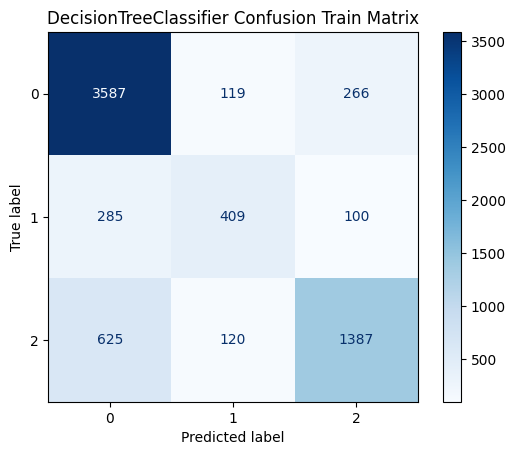

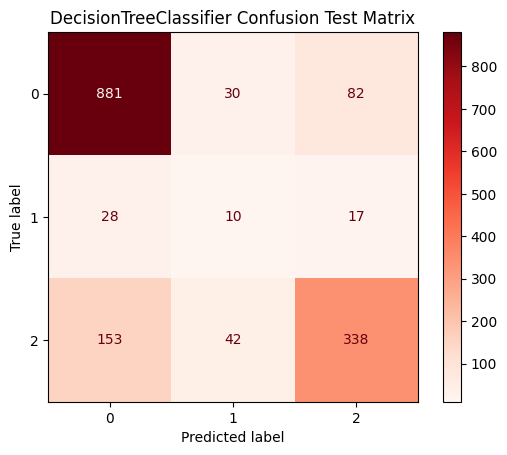

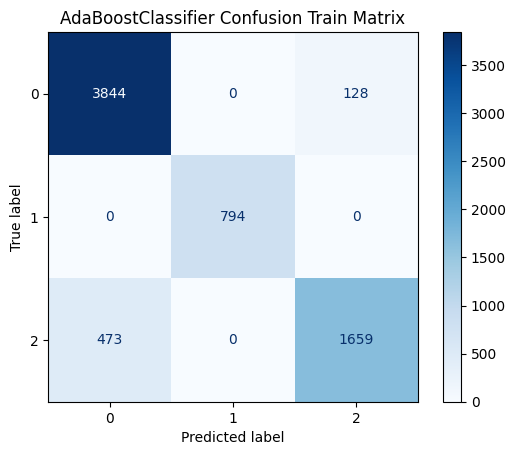

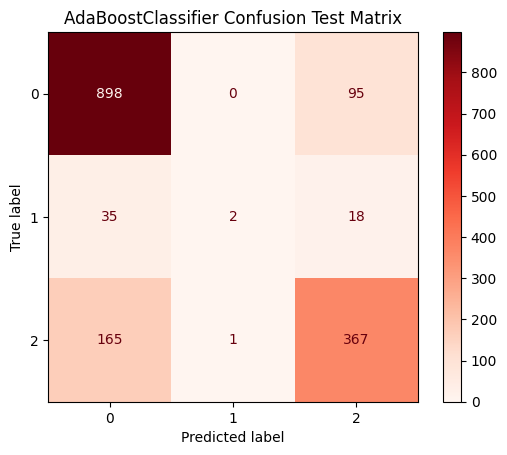

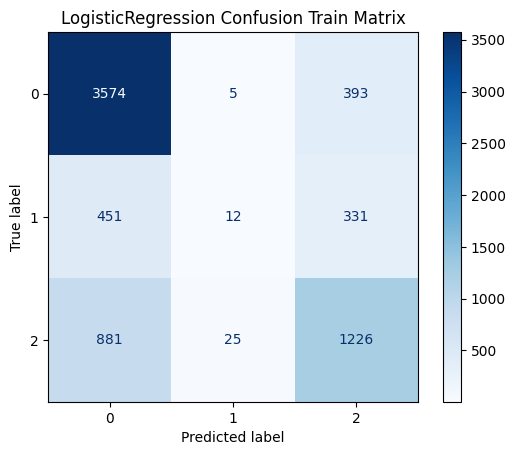

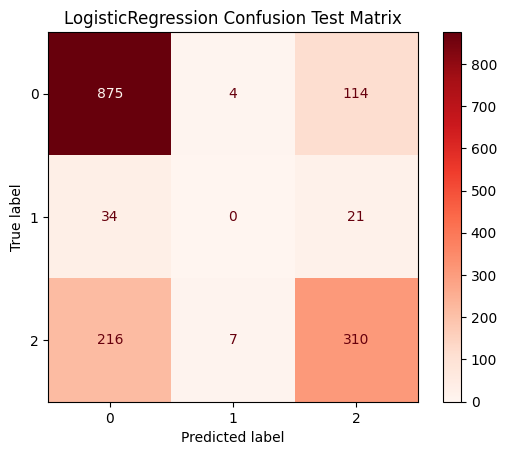

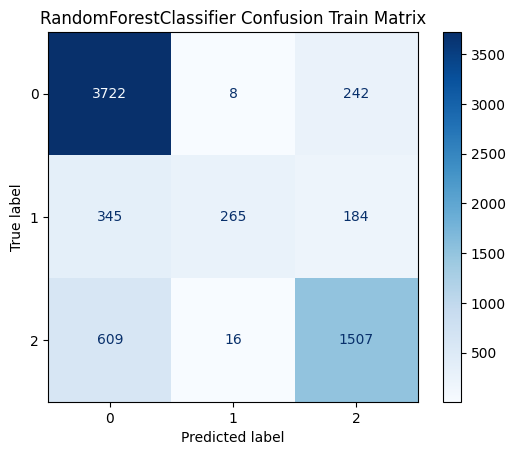

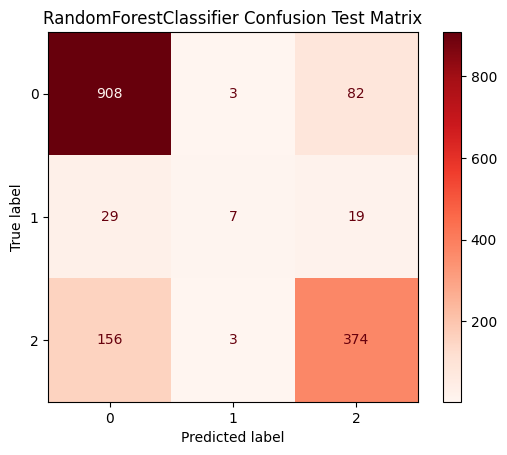

In [ ]:
from Paquetes.metrics import  clasification_metrics

# Need first to be trained to use this function
pipelines = [tree, ada, log_reg, rdf_tree]
piplines_fitted = [pipe.fit(X_osampled, y_osampled) for pipe in pipelines]

metrics_list = clasification_metrics(
                                        y_train = y_osampled,
                                        x_train= X_osampled,
                                        y_test  = y_test,
                                        x_test = X_test,
                                        clasifier = piplines_fitted,
                                        average = 'micro',
                                        metrics = [
                                                        "Recall" ,
                                                        "Precision",
                                                        "F1Score",
                                                        "Especificidad" ,
                                                        "JaccardIndex" ,
                                                        "geometric_mean_score"
                                                    ],
                                        plot_roc_curve = True,
                                        plot_confusion_matrix = True,

                                        )


In [ ]:
# Micro 
for metric in metrics_list:
    print(metric.head())

                          Recall Precision   F1Score JaccardIndex  \
DecisionTreeClassifier       NaN       NaN       NaN          NaN   
Train                   0.780371  0.780371  0.780371     0.639843   
Test                    0.777356  0.777356  0.777356     0.635799   

                       geometric_mean_score  
DecisionTreeClassifier                  NaN  
Train                              0.833472  
Test                               0.831155  
                      Recall Precision   F1Score JaccardIndex  \
AdaBoostClassifier       NaN       NaN       NaN          NaN   
Train               0.912873  0.912873  0.912873     0.839712   
Test                0.801392  0.801392  0.801392     0.668602   

                   geometric_mean_score  
AdaBoostClassifier                  NaN  
Train                          0.934401  
Test                           0.849594  
                      Recall Precision   F1Score JaccardIndex  \
LogisticRegression       NaN       NaN       

c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Exexcution time of clasification_metrics 3.763251781463623


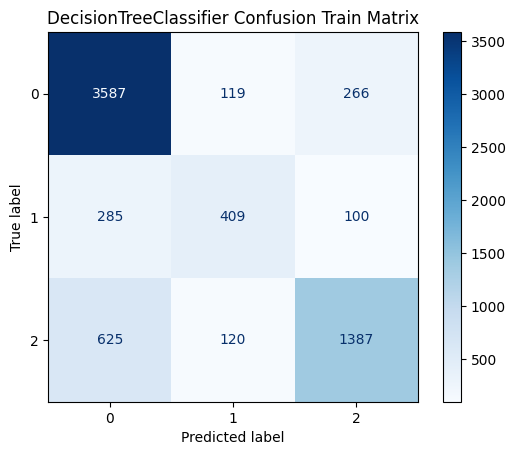

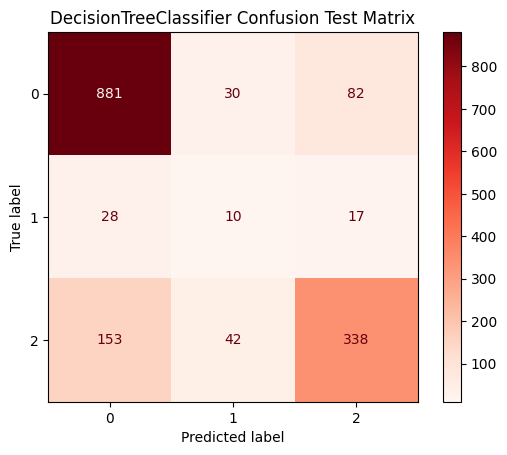

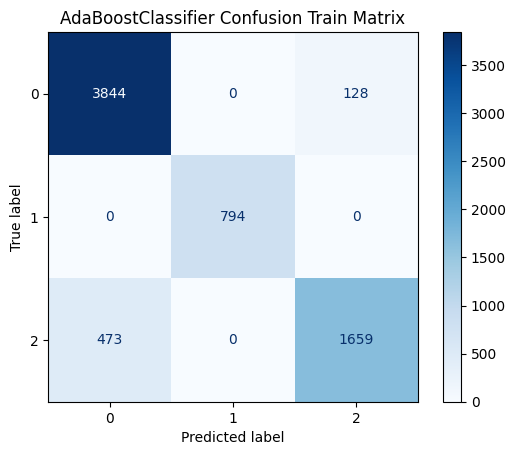

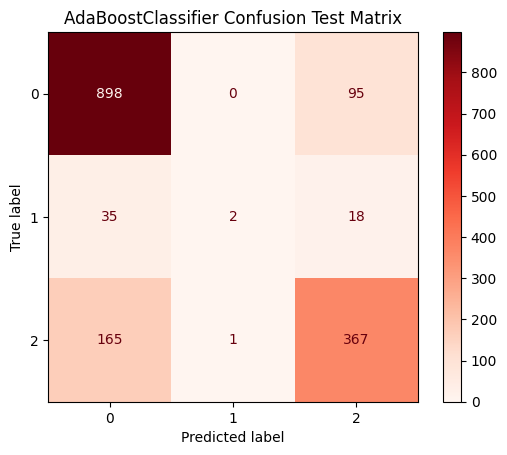

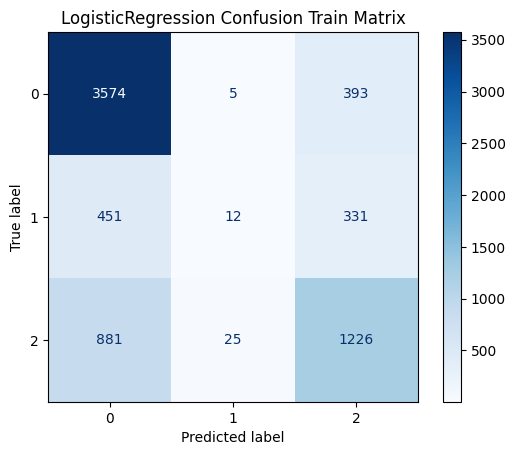

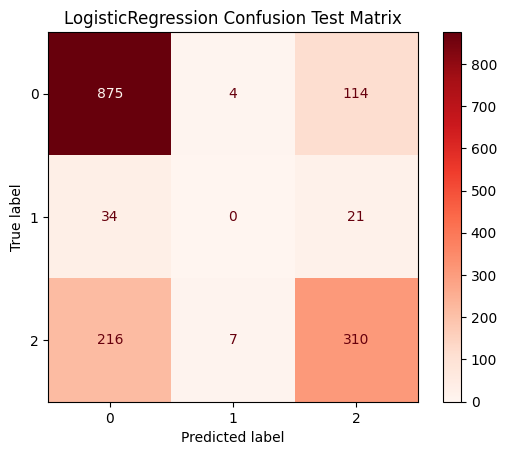

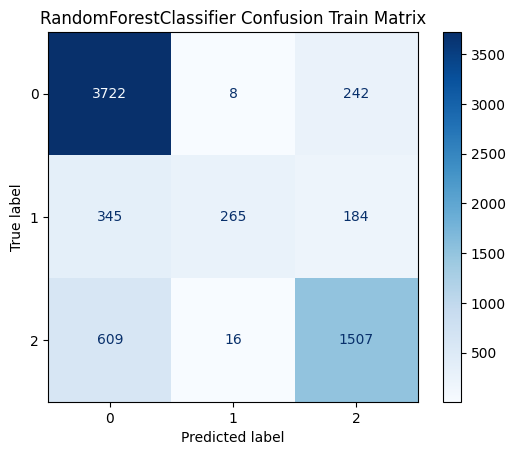

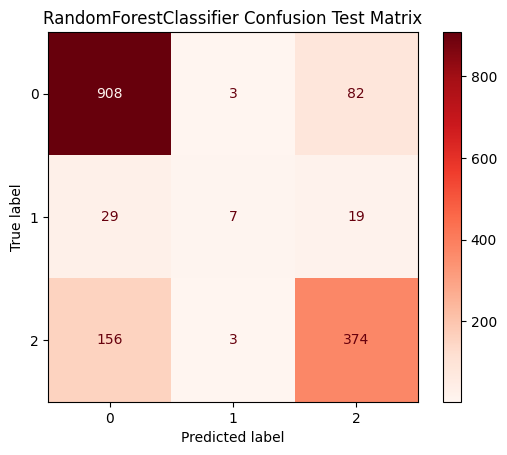

In [ ]:
from Paquetes.metrics import  clasification_metrics

# Need first to be trained to use this function
pipelines = [tree, ada, log_reg, rdf_tree]
piplines_fitted = [pipe.fit(X_osampled, y_osampled) for pipe in pipelines]

metrics_list = clasification_metrics(
                                        y_train = y_osampled,
                                        x_train= X_osampled,
                                        y_test  = y_test,
                                        x_test = X_test,
                                        clasifier = piplines_fitted,
                                        average = 'macro',
                                        metrics = [
                                                        "Recall" ,
                                                        "Precision",
                                                        "F1Score",
                                                        "Especificidad" ,
                                                        "JaccardIndex" 
                                                    ],
                                        plot_roc_curve = True,
                                        plot_confusion_matrix = True,

                                        )


In [ ]:
# macro
for metric in metrics_list:
    print(metric.head())

                          Recall Precision   F1Score JaccardIndex  \
DecisionTreeClassifier       NaN       NaN       NaN          NaN   
Train                   0.689583   0.74001  0.709462     0.561973   
Test                    0.567725  0.574991  0.566771     0.454659   

                       geometric_mean_score  
DecisionTreeClassifier                  NaN  
Train                                   NaN  
Test                                    NaN  
                      Recall Precision   F1Score JaccardIndex  \
AdaBoostClassifier       NaN       NaN       NaN          NaN   
Train               0.915306  0.939602  0.924713     0.866288   
Test                0.543083    0.7497  0.550822     0.452183   

                   geometric_mean_score  
AdaBoostClassifier                  NaN  
Train                               NaN  
Test                                NaN  
                      Recall Precision   F1Score JaccardIndex  \
LogisticRegression       NaN       NaN       